##  Import Required Packages

In [202]:
#Importing the Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

## Project Topic:

***Customer Personality Analysis*** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

***Why is it important***: Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Data Source:
The data for this project was downloaded from the following URL: https://github.com/nailson/ifood-data-business-analyst-test/blob/master/ml_project1_data.csv

The data is in a public GitHub Repo and is freely available

### Machine Learning Model:
The objective in this project is to segment customers to understand them better. As such, this will be a **unsupervised clustering model** based approach

## Data Understanding

In [118]:
# Loading the data
df = pd.read_csv('ml_project1_data.csv')
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


In [119]:
# shape of the data
df.shape

(2240, 29)

In [120]:
# feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Description

* **There are 2240 observations and 29 features in the dataset**
* **Out of this, only the Income column has nulls in it**

* **The columns definitions are given below:**

***People Related Features***

__ID:__ Customer's unique identifier\
**Year_Birth:** Customer's birth year\
**Education:** Customer's education level\
**Marital_Status:** Customer's marital status\
**Income:** Customer's yearly household income\
**Kidhome:** Number of children in customer's household\
**Teenhome:** Number of teenagers in customer's household\
**Dt_Customer:** Date of customer's enrollment with the company\
**Recency:** Number of days since customer's last purchase\
**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise\

***Products Related Features***

**MntWines:** Amount spent on wine in last 2 years<br>
**MntFruits:** Amount spent on fruits in last 2 years<br>
**MntMeatProducts**: Amount spent on meat in last 2 years<br>
**MntFishProducts:** Amount spent on fish in last 2 years<br>
**MntSweetProducts:** Amount spent on sweets in last 2 years<br>
**MntGoldProds:** Amount spent on gold in last 2 years<br>

***Promotion Related Features***

**NumDealsPurchases:** Number of purchases made with a discount<br>
**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

***Place Related Features***

**NumWebPurchases:** Number of purchases made through the company’s website<br>
**NumCatalogPurchases:** Number of purchases made using a catalogue<br>
**NumStorePurchases:** Number of purchases made directly in stores<br>
**NumWebVisitsMonth:** Number of visits to company’s website in the last month

## Data Cleaning and Feature Engineering

In [121]:
# I'm going to drop all the rows containing nulls since only 24 rows (~1%) in a particular feature contain nulls
df = df.dropna()

In [122]:
# The columns Z_CostContact, Z_Revenue have the same value across the board and are of no use. so we can safely drop them
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [123]:
# The column Dt_Customer is stored an object type instead of date. So let's convert that
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [124]:
# The column ID will not be usable for this particular project and can be dropped
df = df.drop(['ID'], axis=1)

In [127]:
# Let's convert Year_Birth and Dt_Customer into usable columns
# For this, let's find out the max date when a customer enrolled and keep this as the reference point
# for calculating Age and number of days enrolled in campaign
most_recent_customer_join_dt = df['Dt_Customer'].max()
most_recent_customer_join_dt_year = most_recent_customer_join_dt.year

df['age'] = most_recent_customer_join_dt_year - df['Year_Birth']
df['num_days_since_enrolled'] = (most_recent_customer_join_dt - df['Dt_Customer']).dt.days

df = df.drop(['Year_Birth', 'Dt_Customer'], axis=1)

In [128]:
#Calculating the total spendings on various items
df['total_amount_spent'] = df[[i for i in df.columns if 'Mnt' in i]].sum(axis=1)

# Redoing marital status to just reflect if the customer has a partner or not
df['partner_bool'] = np.where(df['Marital_Status'].isin(['Together', 'Married']), 1, 0)
df = df.drop('Marital_Status', axis=1)

#Feature indicating total children living in the household
df['total_children'] = df['Kidhome'] + df['Teenhome']

#Feature for total members in the householde
df['family_size'] = df['partner_bool'] + 1 + df['total_children']

# Changing Education to an ordinal column with higher values indicating higher education
df['Education'] = np.where(df['Education'].isin(['PhD', 'Master']), 3, np.where(df['Education'] == 'Graduation', 2, 1))

## EDA

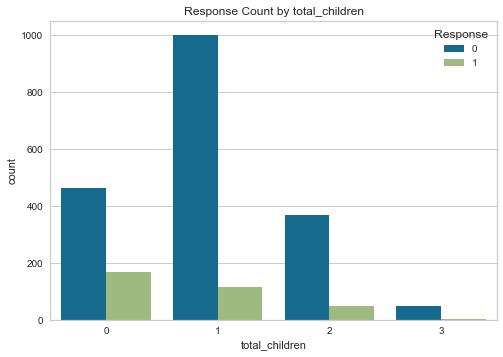

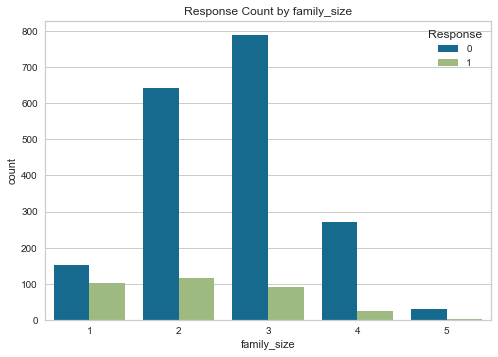

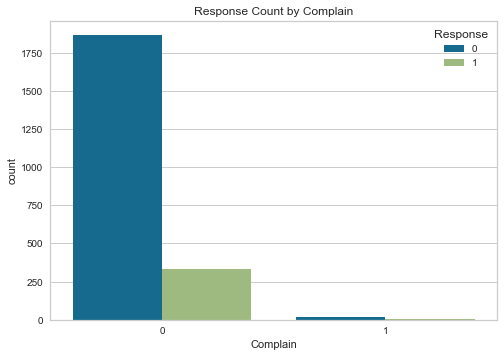

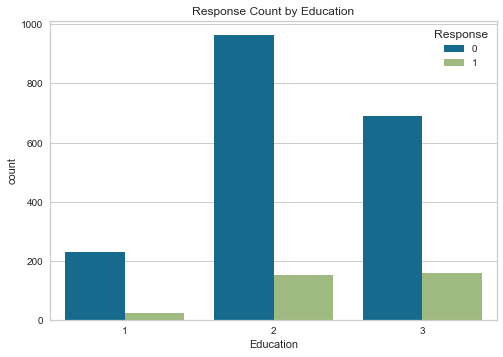

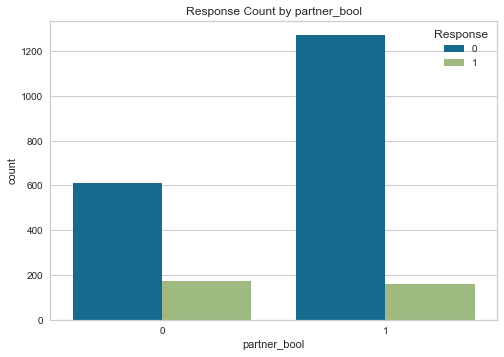

In [129]:
# Let's Explore categorical features by Response
categorical_features=['total_children', 'family_size', 'Complain', 'Education', 'partner_bool']
for col in categorical_features:
    sns.countplot(x=col, hue='Response', data=df)
    plt.title(f'Response Count by {col}')
    plt.show()

* **In general there seems to be very less responses to the campaign**
* **In particular, customers with children in the house responded even less than others**
* **On a positive note, customers with higher education qualificaton (Masters or PhD) respond better. Single customers also respond better to the campaign**
* **Further, the customers who did not respond to the campaign complained about it more indicating that the customer may not have explicitly signed up for the campaign**

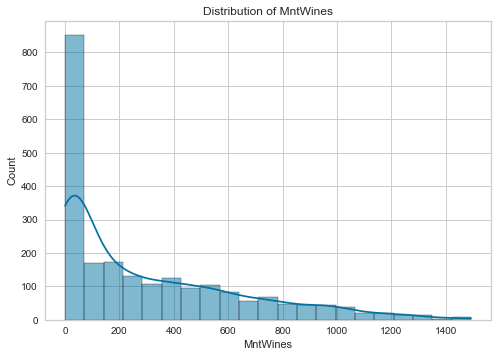

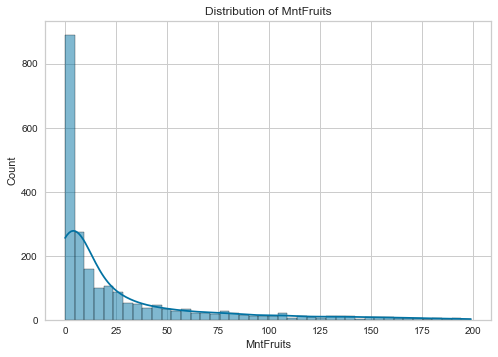

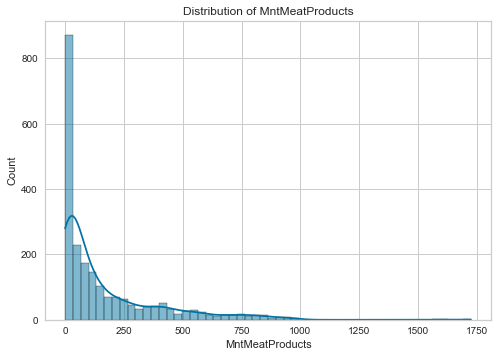

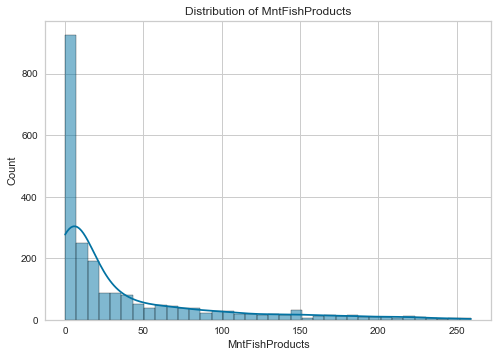

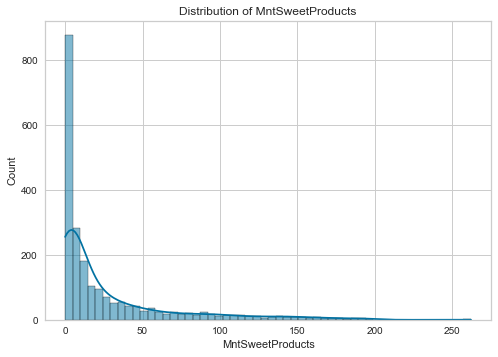

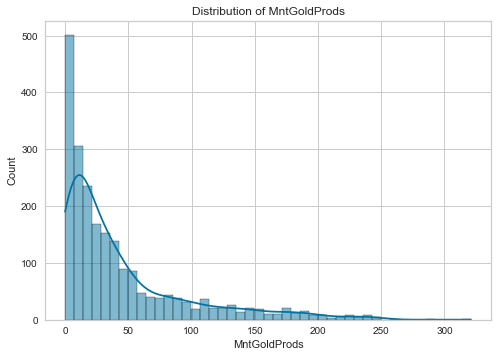

In [130]:
# Let's Explore amount based numerical features
amount_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
               'MntSweetProducts', 'MntGoldProds']
for col in amount_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

* **The distribution of the amount spent on all the products are skewed and have a long tail**
* **Most purchase amounts are zero or negligible**

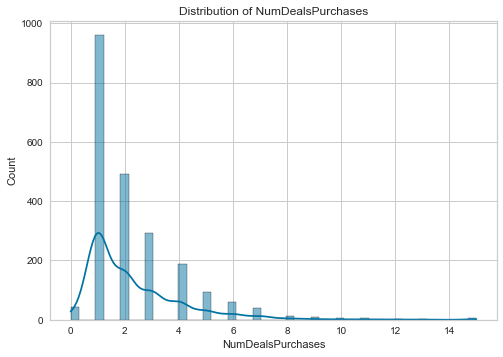

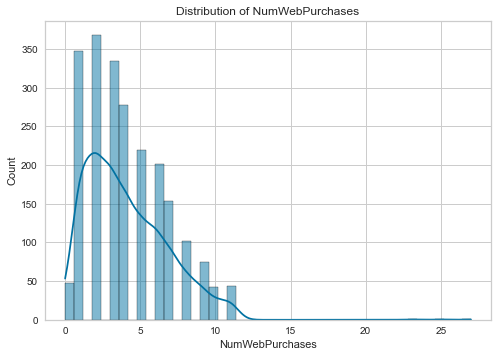

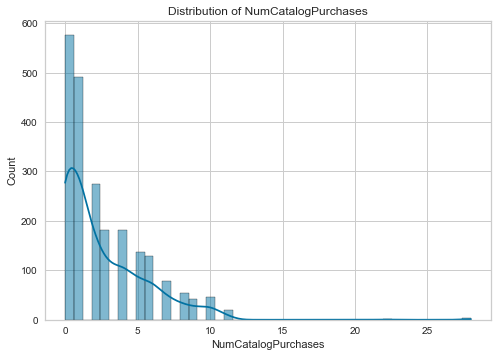

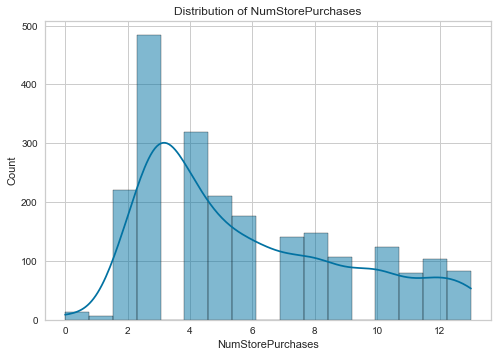

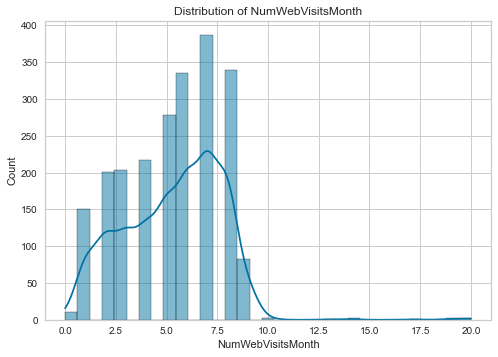

In [131]:
# Let's Explore purchase location based numerical features
purchase_features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']
for col in purchase_features:
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

* **Customers seem to visit the website a lot and prefer shopping from there the most followed by store purchases**
* **Customer don't make more than one deal purchase often**
* **Catalog based purchases are the lowest**

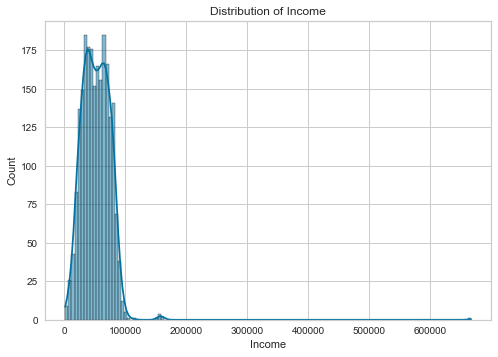

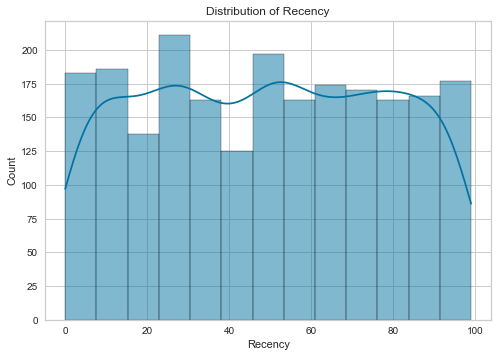

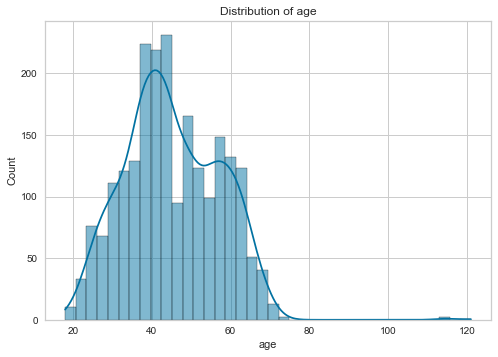

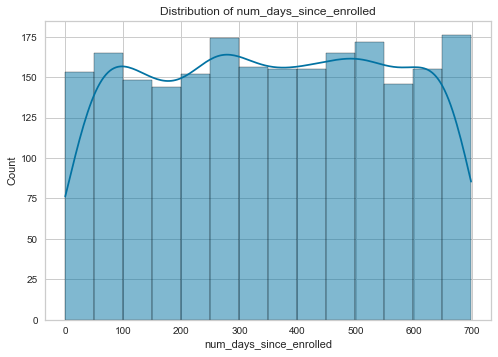

In [132]:
# Let's Explore other numerical features
numerical_cols = ['Income', 'Recency', 'age', 'num_days_since_enrolled']
for col in numerical_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

* **Almost 100% of the income is distributed between 0-100000 but it has a very long right tail**
* **Recency and the number of days from enrollment are both very equally distributed**
* **Age has an almost normal distribution with most customers being around 40 at the time of the data**

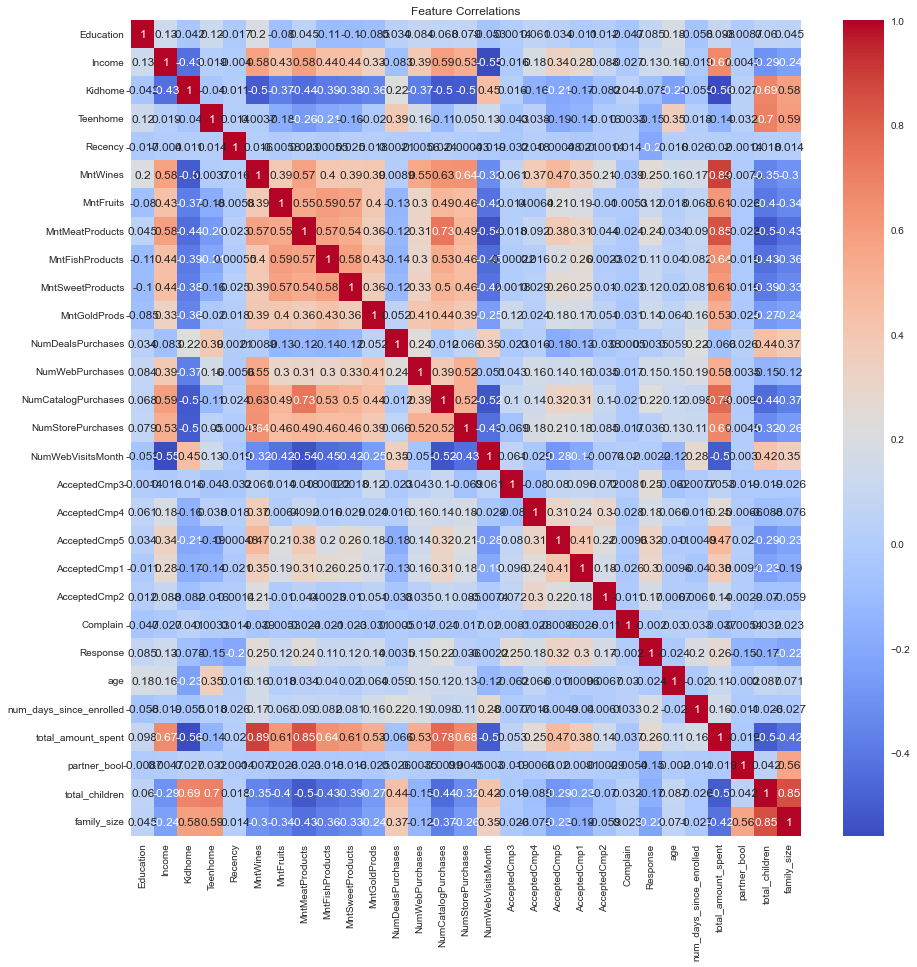

In [133]:
# let's take a look at the feature correlation
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Feature Correlations')
plt.show()

**The features most correlated with Response are:**
* total_amount_spent (MntWines driving this the most)
* family_size
* Recency
* NumCatalogPurchases
* num_days_since_enrolled

**There is also significant Multicollinearity in the data. The top ones are between**
* Amount spent on Meat with NumCatalogPurchases and total_amount_spent
* Amount spent on Wine with total_amount_spent
* Family Size and total children

In [134]:
# Let's cap the features which had a skew based on the distribution we saw above
df['age'] = np.where(df['age'] > 80, 80, df['age'])
df['Income'] = np.where(df['Income'] > 100000, 100000, df['Income'])
df['NumWebVisitsMonth'] = np.where(df['NumWebVisitsMonth'] > 10, 10, df['NumWebVisitsMonth'])
df['NumCatalogPurchases'] = np.where(df['NumCatalogPurchases'] > 10, 10, df['NumCatalogPurchases'])
df['NumWebPurchases'] = np.where(df['NumWebPurchases'] > 12, 12, df['NumWebPurchases'])

# Capping the values at the 85th quantile for all the Amount Values
for col in [i for i in df.columns if 'Mnt' in i]:
    df[col] = np.where(df[col] > df[col].quantile(0.85), df[col].quantile(0.85), df[col])

In [135]:
# let's create a subset of the data without the campaign related features
cols_to_remove = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                  'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
model_df = df.drop(cols_to_remove, axis=1)

* **We've completed the EDA and the model is clean and ready for modelling**

## Model Building

In [137]:
# Let's Scale the data first
scaler = StandardScaler()
scaler.fit(model_df)
model_df = pd.DataFrame(scaler.transform(model_df),columns= model_df.columns)
print("All features are now scaled")

All features are now scaled


### **Let's reduce the number of Dimensions in the data**

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Dimensionality reduction with PCA**

For this project, I will keep the number of dimensions to **3** so that it's easy to visualize

In [156]:
pca = PCA(n_components=3)
pca.fit(model_df)

pca_df = pd.DataFrame(pca.transform(model_df))
pca_df.head(2)

,0,1,2
0,5.180443,-0.18304,2.458615
1,-3.106494,0.04760,-1.637961


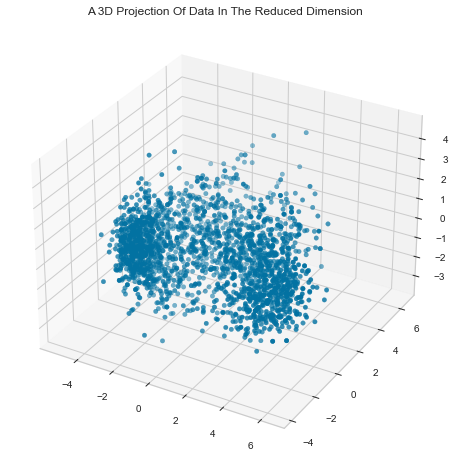

In [157]:
#Let's do a 3D Projection Of Data using the first three dimensions
x = pca_df[0]
y = pca_df[1]
z = pca_df[2]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### **Clustering**

* I'll be evaluating two models here - KMeans and Hierarchical Clustering
* The cluster performance will be measured using an objective method and a subjective method
* The objective metric will be the silhoutte score which can range from -1 to 1 with higher values indicating better performance
* The subjective evaluation will be based on the cluster characteristics and cluster distribution

Elbow Method to determine the number of clusters to be formed:


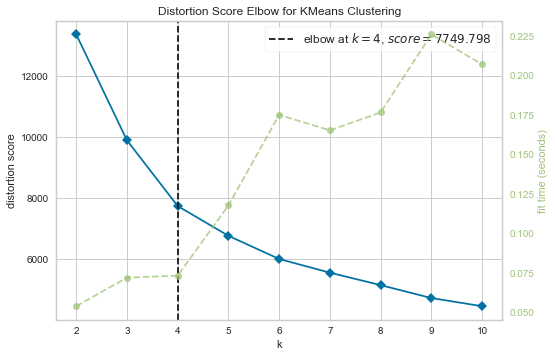

In [158]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
_ = Elbow_M.show()

* **We can see that the reduction in distortion score is highest when K = 4**

**KMeans Model**

In [178]:
#Initiating the Kmeans Clustering model
d = {}
model_performance_df = pd.DataFrame()
initiation = ['k-means++', 'random']
for i in initiation:
    km = KMeans(n_clusters=4, random_state=144, init=i)
    # fit model and predict clusters
    yhat_km = pd.Series(km.fit_predict(pca_df))
    distribution_of_clusters = yhat_km.value_counts(normalize=True) * 100
    d['initiation'] = i
    d['silhouette_score'] = metrics.silhouette_score(pca_df, yhat_km)
    d['biggest_cluster_percentage'] = distribution_of_clusters.max()
    d['smallest_cluster_percentage'] = distribution_of_clusters.min()
    model_performance_df = model_performance_df.append(d, ignore_index=True)

In [179]:
model_performance_df.sort_values(['silhouette_score', 'smallest_cluster_percentage'], ascending=[False, False])

,biggest_cluster_percentage,initiation,silhouette_score,smallest_cluster_percentage
1,27.617329,random,0.357436,23.916968
0,27.481949,k-means++,0.357369,23.962094


**The performance of both models are equally good. Let's choose the best Kmeans as the one with random initiation**

**Hierarchical Clustering**

In [173]:
#Initiating the Agglomerative Clustering model
d = {}
model_performance_df = pd.DataFrame()
linkages = ['ward', 'single', 'complete', 'average']
distances = ['manhattan', 'euclidean', 'l1', 'l2', 'cosine']
for i in linkages:
    for j in distances:
        try:
            AC = AgglomerativeClustering(n_clusters=4, affinity=j, linkage=i)
            # fit model and predict clusters
            yhat_AC = pd.Series(AC.fit_predict(pca_df))
            distribution_of_clusters = yhat_AC.value_counts(normalize=True) * 100
            d['linkage'] = i
            d['distance'] = j
            d['silhouette_score'] = metrics.silhouette_score(pca_df, yhat_AC)
            d['biggest_cluster_percentage'] = distribution_of_clusters.max()
            d['smallest_cluster_percentage'] = distribution_of_clusters.min()
            model_performance_df = model_performance_df.append(d, ignore_index=True)
        except:
            pass

In [175]:
model_performance_df.sort_values(['silhouette_score', 'smallest_cluster_percentage'], ascending=[False, False])

,biggest_cluster_percentage,distance,linkage,silhouette_score,smallest_cluster_percentage
12,45.036101,euclidean,average,0.361162,0.090253
14,45.036101,l2,average,0.361162,0.090253
11,43.907942,manhattan,average,0.358175,0.361011
13,43.907942,l1,average,0.358175,0.361011
0,36.823105,euclidean,ward,0.333132,15.703971
7,36.958484,euclidean,complete,0.320792,1.308664
9,36.958484,l2,complete,0.320792,1.308664
10,32.716606,cosine,complete,0.319438,14.214801
6,33.348375,manhattan,complete,0.297267,17.734657
8,33.348375,l1,complete,0.297267,17.734657


**The best Hierarchical Model is the one using euclidean distance and ward linkage - since it has the best cluster distribution combined with a good silhoutte score.**

**But the overall best model is the KMeans model**

In [182]:
# let's add the clusters to our datasets
df['clusters'] = KMeans(n_clusters=4, random_state=144, init='random').fit_predict(pca_df)
pca_df['clusters'] = KMeans(n_clusters=4, random_state=144, init='random').fit_predict(pca_df)

**Visualize Clusters**

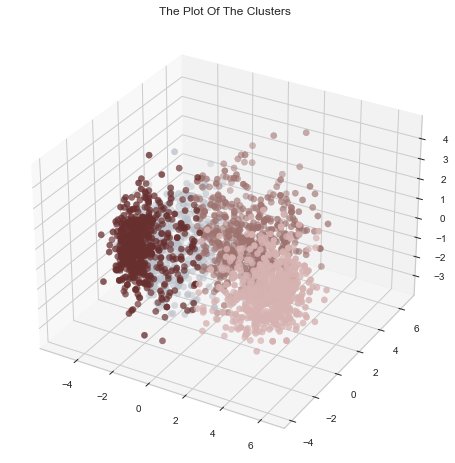

In [186]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="pca")
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9"])
ax.scatter(x, y, z, s=40, c=pca_df['clusters'], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

**In general, we can observe the differenciation between the clusters clearly**

**Further Model Evaluation on the Main Data**

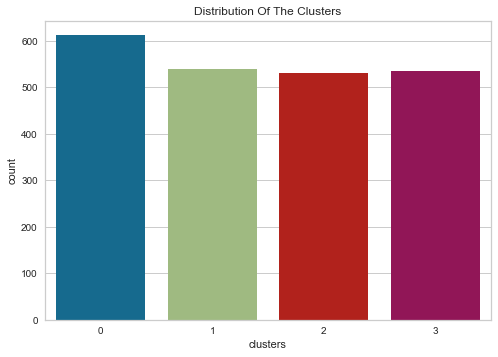

In [187]:
# Let's look at the cluster distribution
pl = sns.countplot(x=df['clusters'])
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters are distributed fairly as expected

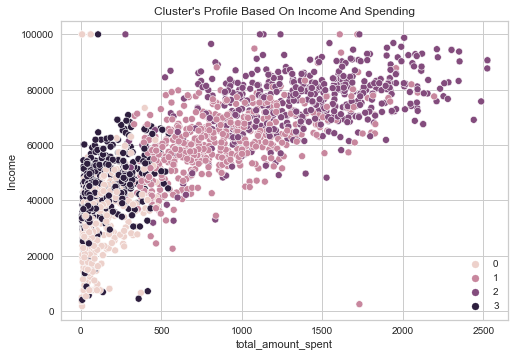

In [188]:
# Let's look at some features distributed across clusters
pl = sns.scatterplot(data=df, x=df['total_amount_spent'], y=df['Income'], hue=df['clusters'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: low spending & low income
* group 1: medium spending & medium income
* group 2: high spending & high income 
* group 3: high income & low spend

c:\users\dhria\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dhria\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dhria\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dhria\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

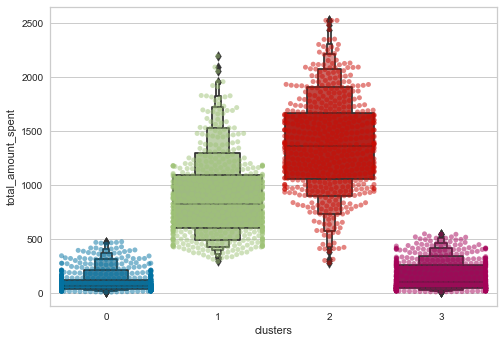

In [210]:
# Let's identify which group is our biggest spender
plt.figure()
pl=sns.swarmplot(x=df['clusters'], y=df['total_amount_spent'], alpha=0.5)
pl=sns.boxenplot(x=df['clusters'], y=df['total_amount_spent'])
plt.show()

From the above plot, it can be clearly seen that cluster 2 and cluster 1 are our biggest set of customers.
We can explore what each cluster is spending on for the targeted marketing strategies.

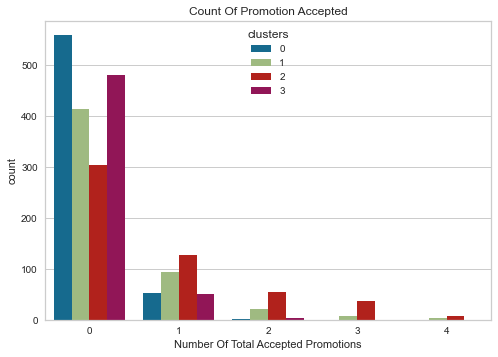

In [190]:
# Let us next explore how did our campaigns do in the past.
# Creating a feature to get a sum of accepted promotions 

df['total_promotions_accepted'] = df[[i for i in df.columns if 'Accepted' in i]].sum(axis=1)
# Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df['total_promotions_accepted'], hue=df['clusters'])
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.show()

* There has been an underwhelming response to the campaigns so far
* Better-targeted and well-planned campaigns are required in the future
* On the bright side, cluster 2 has the max number of customers who responded to the campaign

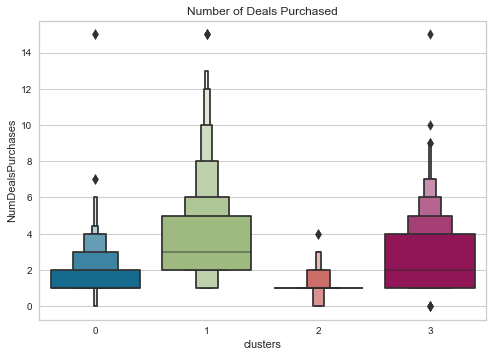

In [193]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df['NumDealsPurchases'], x=df['clusters'])
pl.set_title('Number of Deals Purchased')
plt.show()

* Deals unlike campaigns perform better but surprisingly not for cluster 2

**As the last step, let's profile our customers**

we have formed the clusters and looked at their purchasing habits. 
Let us now see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. 
On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 576x396 with 0 Axes>

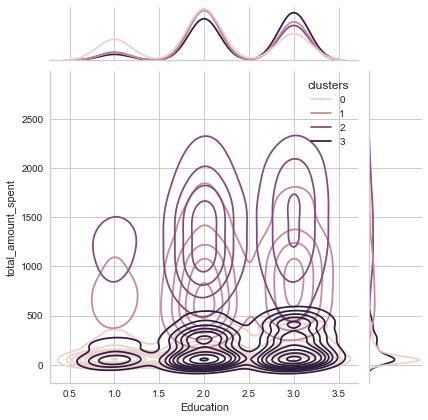

<Figure size 576x396 with 0 Axes>

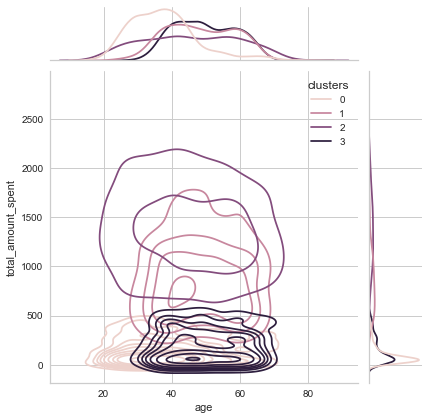

<Figure size 576x396 with 0 Axes>

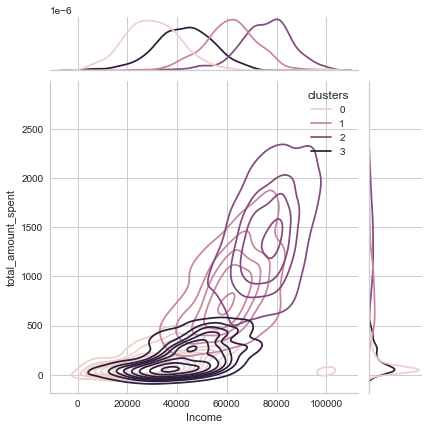

<Figure size 576x396 with 0 Axes>

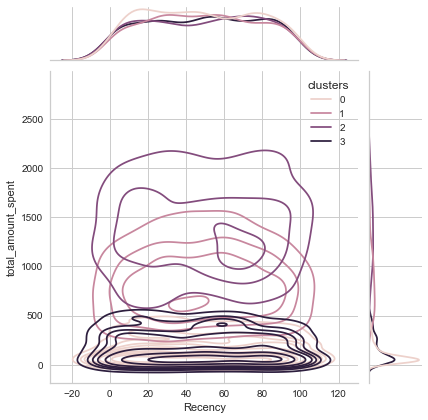

<Figure size 576x396 with 0 Axes>

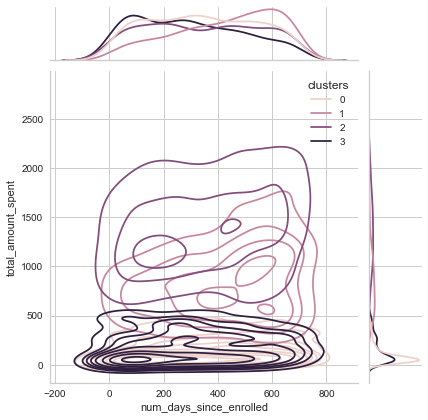

<Figure size 576x396 with 0 Axes>

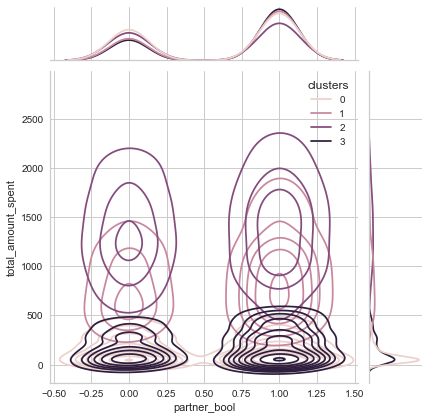

<Figure size 576x396 with 0 Axes>

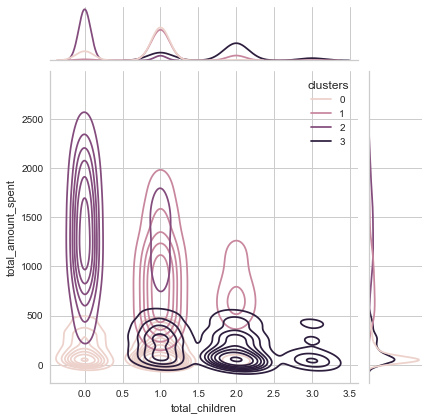

<Figure size 576x396 with 0 Axes>

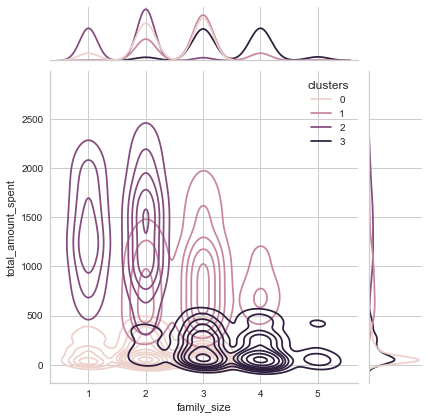

In [200]:
personal = ['Education', 'age', 'Income', 'Recency',
            'num_days_since_enrolled', 'partner_bool',
            'total_children', 'family_size']
for i in personal:
    _ = plt.figure()
    _ = sns.jointplot(x=df[i], y=df['total_amount_spent'], hue=df['clusters'], kind="kde")
    _ = plt.show()

**Customer Segmentation Profile:**

* ***Cluster 0:***
    - Lowest education and income
    - Youngest Customers
    - They are the lowest spenders
    - Have one child, not a teenager
    - Married or in a Relationship
    - Might respond to campaigns but do not have the means to act significantly on them. Should be excluded for future campaigns<br>
<br>
* ***Cluster 1:***
    - Well Educated
    - High Income and High Spend
    - Have one child, a teenager
    - Married or in a Relationship
    - Likely to respond to campaigns and will act on them<br>
<br>
* ***Cluster 2:***
    - Well Educated
    - Highest Income and Highest Spend
    - Not in a relationship and don't have kids
    - Best segment for marketing campaigns. Will respond well to campaigns and will bring in sales<br>
<br>
* ***Cluster 3:***
    - Oldest customers
    - Best Educated with medium income
    - Married or in a Relationship
    - Have 2 children - one kid and one teenager
    - Low spenders
    - Least Likely to respond to marketing campaigns and should be avoided

## Conclusion

* In this project, I performed unsupervised clustering. 
* I used dimensionality reduction followed by two clustering methods - Kmeans and Hierarchical
* I came up with 4 clusters and further used them for profiling customers to plan better marketing strategies
* Customers in cluster 1 and cluster 2 are the best customers and the remaining customers should not be focused for campaigns